This notebook creates an image of the bathymetry to be used in the storm surges paper. Things included:

1. Bathymetry
2. Location of Rivers
3. Storm Surge points

Other important points?

In [1]:
from __future__ import division
import netCDF4 as NC
import numpy as np
import os
import scipy.io as sio

%matplotlib inline
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools
from matplotlib.path import Path
import matplotlib.patches as patches
import pandas as pd

Coastline information:

/ocean/rich/home/matlab/m_mapWK/pb/britishcolumbia2pts.txt

Washington coastline

/ocean/rich/home/matlab/m_mapWK/pb/washington2pts.txt

/ocean/rich/more/mmapbase/bcgeo/PNW.mat

has a 2-column variable 'ncst' with NaN-separated line segments
that make polygons for the BC/WA coast.

### Define a punch of plotting functions

### Coastline

In [2]:
topo_datastruct = sio.loadmat('/ocean/rich/more/mmapbase/bcgeo/PNW.mat')
coast={}
coast['lat'] = topo_datastruct['ncst'][:,1]
coast['lon'] = topo_datastruct['ncst'][:,0]

def draw_coast(ax):
    #ax.set_aspect(5/4.4)    

    #Plot coast line
    ax.plot(coast['lon'],coast['lat'],'-k',rasterized=True,markersize=1) 
    ax.set_xlim([-128.5, -121])
    ax.set_ylim([46, 52])
    #ax.set_xticks([])
    #ax.set_yticks([])

### Bathy

In [3]:
#bathymetry
fB = NC.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc','r')
lats = fB.variables['nav_lat']
lons = fB.variables['nav_lon']
D = fB.variables['Bathymetry']

#rivers info
test = NC.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/rivers/rivers_cnst.nc','r')
plotting = test.variables['rorunoff'][0,:,:]


def draw_bathy(ax,grid):
   
    if grid=='grid':
        mesh=ax.pcolormesh(D[:],cmap=cmap)

    elif grid=='map':
        mesh=ax.pcolormesh(lons[:],lats[:],D[:],cmap=cmap)
        mesh=ax.contourf(lons[:],lats[:],D[:],15,cmap=cmap)
    
    viz_tools.plot_coastline(ax,fB,coords=grid)   
    cbar=fig.colorbar(mesh,ax=ax)
    ax.set_aspect(5/4.4)
    cbar.set_label('{depth.long_name} [{depth.units}]'.format(depth=D))

### Rivers

In [4]:
def draw_rivers(ax,grid):
    for i in range(0,898):
        for j in range(0,398):
            if plotting[i,j] > 0:
                if grid=='grid':
                    ax.plot(j,i,'ob',markersize=3)  
                elif grid=='map':
                    ax.plot(lons[i,j],lats[i,j],'og',markersize=5,rasterized=True)  


### Storms

In [5]:
#Storm surge points
istorms=[328,195,213,124]
jstorms=[467,298,351,747]
ls=['Point Atkinson','Victoria','Patricia Bay', 'Campbell River']

def draw_storms(ax,grid):
    for k in range(0,len(istorms)):
        if grid=='grid':
            ax.plot(istorms[k],jstorms[k],'*r',markersize=15)
        elif grid=='map':
            x=lons[jstorms[k],istorms[k]]; y=lats[jstorms[k],istorms[k]]
            label=ls[k]
            ax.plot(x,y,'*r',markersize=15,rasterized=True)
            if label == 'Victoria':
                ax.annotate(label, xy=(x,y), xytext = (-65, 8),textcoords = 'offset points',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=11)
            elif label =='Point Atkinson':
                ax.annotate(label, xy=(x,y), xytext = (10, 30),textcoords = 'offset points',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=11)
            elif label =='Campbell River':
                ax.annotate('Campbell \n   River', xy=(x,y), xytext = (-70, -30),textcoords = 'offset points',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=11)
            if label == 'Patricia Bay':
                ax.annotate(label, xy=(x,y), xytext = (-90, -5),textcoords = 'offset points',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=11)

### Tides

In [6]:

filename = '/data/nsoontie/MEOPAR/analysis/compare_tides/obs_tidal_wlev_const_all.csv'

harm_obs = pd.read_csv(filename,sep=';',header=0)
harm_obs = harm_obs.rename(columns={'Site': 'site', 'Lat': 'lat', 'Lon': 'lon', 
                                    'M2 amp': 'M2_amp', 'M2 phase (deg UT)': 'M2_pha',
                                   'K1 amp': 'K1_amp', 'K1 phase (deg UT)': 'K1_pha'})

def draw_tidestations(ax):
    stations_obs = ['Port Renfrew','Sheringham Point','Pedder Bay', 'Esquimalt',
                    'Victoria','Clover Point','Finnerty Cove', 'Fulford Harbour',
                    'Tumbo Channel','Patos Island','Whaler Bay', 'Tsawwassen',
                    'Sandheads', 'Point Grey','Point Atkinson','Gibsons Landing',
                    'Halfmoon Bay','Irvines Landing','Powell River', 'Lund',
                    'Twin Islets','Campbell River','Maude Island E', 'Nymphe Cove',
                    'Seymour Narrows','Brown Bay','Chatham Point','Kelsey Bay','Yorke Island']
    numsta=len(stations_obs)
    lon=[]; lat=[]
    for stn in range(numsta):
        location = stations_obs[stn]
        lon.append(-harm_obs.lon[harm_obs.site==location])
        lat.append(harm_obs.lat[harm_obs.site==location])
        print stn+1, location
        ax.annotate(stn+1, xy = (-harm_obs.lon[harm_obs.site==location],harm_obs.lat[harm_obs.site==location]), 
                    xytext = (-5,5),ha = 'left', va = 'bottom',textcoords = 'offset points',fontsize=10)
    ax.scatter(lon,lat,marker='^',s=80,edgecolor='black',linewidth='1',facecolor='green',rasterized=True)


/home/nsoontie/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


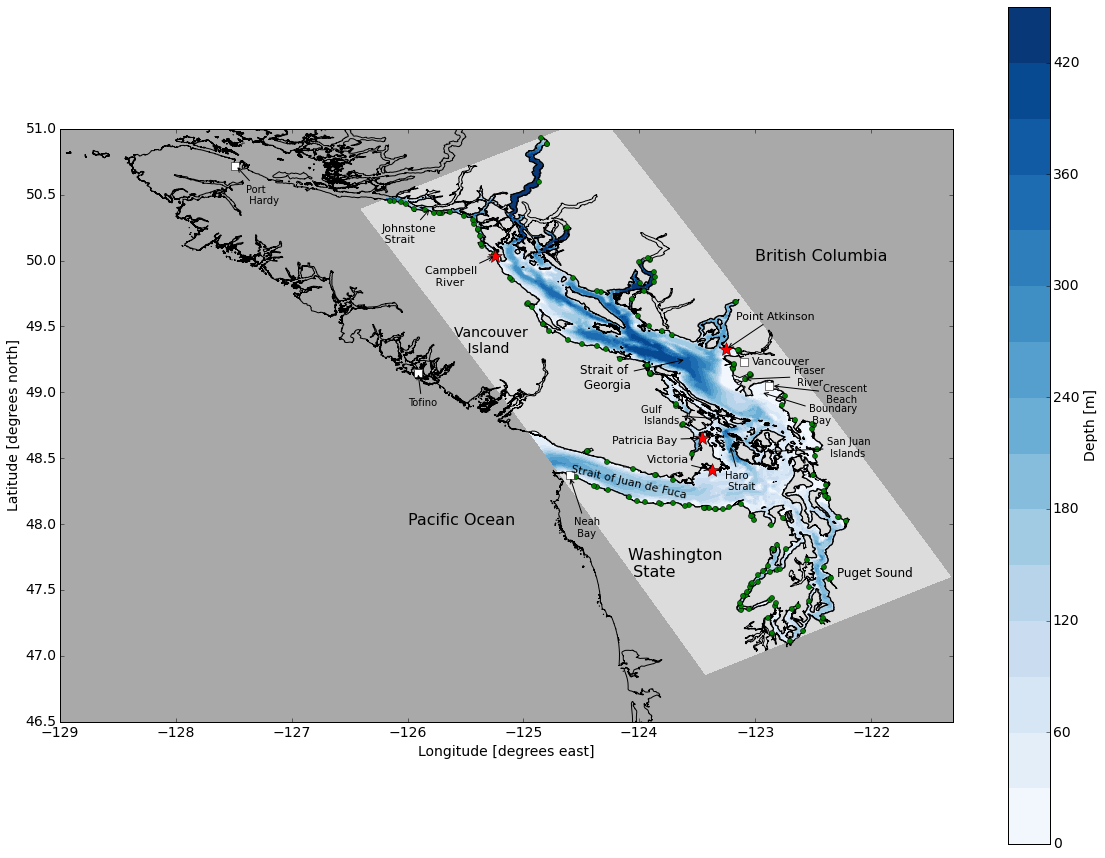

In [7]:
cmap = plt.get_cmap('Blues')
cmap.set_bad('gainsboro')
bbox={'facecolor':'white', 'alpha':0.8, 'lw':0}

fig, axs = plt.subplots(1, 1, figsize=(20,15)) #(12,9)
ax2=axs
g = 'map'
draw_coast(ax2)
draw_bathy(ax2,g)
draw_rivers(ax2,g)   
#draw_tidestations(ax2)
draw_storms(ax2,g)

ax2.set_ylabel('{latitude.long_name} [{latitude.units}]'.format(latitude=lats))
ax2.set_xlabel('{longitude.long_name} [{longitude.units}]'.format(longitude=lons))
#ax2.set_xlim([-126.4,-121.3])
#ax2.set_ylim([46.8,51.1])
ax2.set_xlim([-129,-121.3])#
ax2.set_ylim([46.5,51])#

font = {'size'   :14}

plt.rc('font', **font)

ax2.text(-126,48,'Pacific Ocean', fontsize=16)
ax2.text(-124.1,47.6,'Washington \n State', fontsize=16)
ax2.text(-122.3,47.6,'Puget Sound', fontsize=12)
ax2.text(-125.6,49.3,'Vancouver \n   Island', fontsize=14)
ax2.text(-123,50,'British Columbia',fontsize=16)
ax2.text(-124.6,48.4,'Strait of Juan de Fuca',fontsize=11,rotation=-13)
ax2.plot(-123.1,49.23,'sw',markersize=8,rasterized=True)
ax2.text(-123.03,49.21,'Vancouver',fontsize=11)
ax2.annotate('Strait of \n Georgia',xy=(-123.6,49.25),xytext = (-124.51, 49.03),textcoords = 'data',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=12)
ax2.annotate('Johnstone \n Strait', xy=(-125.8,50.4), xytext = (-50, -35),textcoords = 'offset points',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=11)
ax2.annotate('Fraser \n River', xy=(-123.1,49.1), xytext = (50,-6),textcoords = 'offset points',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=10) #(40,-20)
#ax2.annotate('Vancouver', xy=(-123.1,49.23), xytext = (10,-5),textcoords = 'offset points',
#                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=11)
ax2.annotate('Haro \n Strait', xy=(-123.22,48.6), xytext = (-5,-45),textcoords = 'offset points',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=10)
ax2.annotate('San Juan \n Islands', xy=(-122.9,48.55), xytext = (60,-5),textcoords = 'offset points',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=10)
ax2.annotate('Gulf \n Islands', xy=(-123.3,48.8), xytext = (-80,-5),textcoords = 'offset points',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=10)
ax2.plot(-124.6, 48.37,'sw',markersize=8,rasterized=True)
ax2.annotate('Neah \n Bay', xy=(-124.6,48.36), xytext = (4,-60),textcoords = 'offset points',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=10) #
ax2.plot(-127.49, 50.72,'sw',markersize=8,rasterized=True)
ax2.annotate('Port \n Hardy', xy=(-127.48, 50.72), xytext = (10,-38),textcoords = 'offset points',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=10) #
ax2.plot(-122.88, 49.05,'sw',markersize=8,rasterized=True)
ax2.annotate('Crescent \n Beach', xy=(-122.86, 49.05), xytext = (51, -17),textcoords = 'offset points',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=10) #
ax2.annotate('Boundary \n Bay', xy=(-122.95, 49), xytext = (48, -31),textcoords = 'offset points',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=10)

#Tofino
ax2.plot(-125.91,49.15,'sw',markersize=8,rasterized=True)
ax2.annotate('Tofino', xy=(-125.91,49.15), xytext = (-126,48.9),textcoords = 'data',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=10)


ax2.set_axis_bgcolor('darkgray')
fig.show()

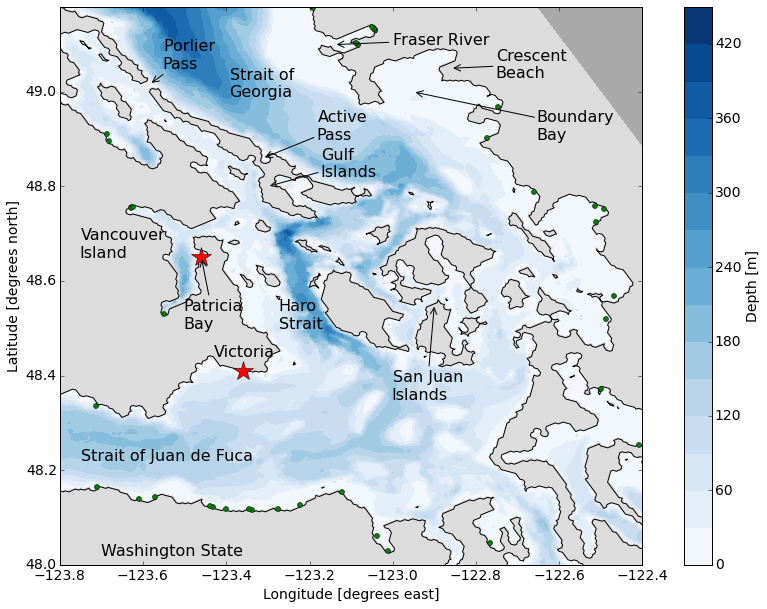

In [9]:
cmap = plt.get_cmap('Blues')
cmap.set_bad('gainsboro')
bbox={'facecolor':'white', 'alpha':0.8, 'lw':0}

fig, axs = plt.subplots(1, 1, figsize=(15,10)) #(12,9)
ax3=axs
g = 'map'
#draw_coast(ax3)
draw_bathy(ax3,g)
draw_rivers(ax3,g)
#draw_storms(ax3,g)

ax3.set_ylabel('{latitude.long_name} [{latitude.units}]'.format(latitude=lats))
ax3.set_xlabel('{longitude.long_name} [{longitude.units}]'.format(longitude=lons))
ax3.set_xlim([-123.8, -122.4]) #123.8
ax3.set_ylim([48, 49.18]) #49.15

ax3.text(-123.7, 48.02, 'Washington State', fontsize=16)
ax3.text(-123.75, 48.65, 'Vancouver\nIsland', fontsize=16)
ax3.text(-123.75, 48.22, 'Strait of Juan de Fuca',fontsize=16)
ax3.text(-123.39, 48.99, 'Strait of \nGeorgia', fontsize=16)
ax3.text(-123.27, 48.50, 'Haro\nStrait', fontsize=16)
ax3.plot(-123.36, 48.41,'*r',markersize=20,rasterized=True)
ax3.text(-123.43, 48.44,'Victoria',fontsize=16)
ax3.plot(-123.46, 48.65,'*r',markersize=20,rasterized=True)
ax3.annotate('Patricia\nBay',xy=(-123.46, 48.65),xytext = (-123.5, 48.5),textcoords = 'data',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=16)
ax3.annotate('San Juan\nIslands', xy=(-122.9,48.55), xytext = (-123, 48.35),textcoords = 'data',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=16)
ax3.annotate('Gulf\nIslands', xy=(-123.3,48.8), xytext = (-123.17,48.82),textcoords = 'data',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=16)
ax3.annotate('Fraser River', xy=(-123.14,49.1), xytext = (-123,49.1),textcoords = 'data',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=16)
ax3.annotate('Crescent\nBeach', xy=(-122.86, 49.05), xytext = (-122.75, 49.03),textcoords = 'data',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=16)
ax3.annotate('Boundary\nBay', xy=(-122.95, 49), xytext = (-122.65, 48.9),textcoords = 'data',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=16)
ax3.annotate('Active\nPass', xy=(-123.312,48.86), xytext = (-123.18,48.9),textcoords = 'data',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=16)

ax3.annotate('Porlier \nPass', xy=(-123.583333,49.016667), xytext = (-123.55,49.05),textcoords = 'data',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=16)

ax3.set_axis_bgcolor('darkgray')
fig.show()

In [10]:
fig.savefig('../RoughWork/Figures/bathy_zoom.png',bbox_inches='tight',dpi=300)

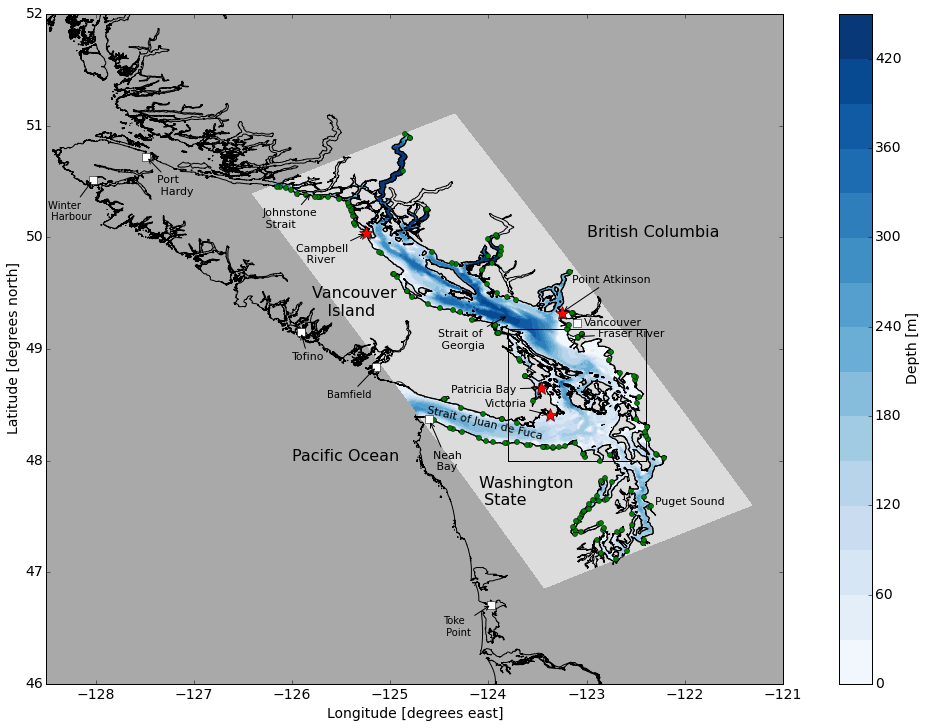

In [14]:
cmap = plt.get_cmap('Blues')
cmap.set_bad('gainsboro')
bbox={'facecolor':'white', 'alpha':0.8, 'lw':0}

fig, axs = plt.subplots(1, 1, figsize=(20,12)) #(12,9)
ax4=axs
g = 'map'
draw_coast(ax4)
draw_bathy(ax4,g)
draw_rivers(ax4,g)   
draw_storms(ax4,g)

ax4.set_ylabel('{latitude.long_name} [{latitude.units}]'.format(latitude=lats))
ax4.set_xlabel('{longitude.long_name} [{longitude.units}]'.format(longitude=lons))
ax2.set_xlim([-129,-121.3])#
ax2.set_ylim([46.5,51])#

font = {'size'   :14}

plt.rc('font', **font)

ax4.text(-126,48,'Pacific Ocean', fontsize=16)
ax4.text(-124.1,47.6,'Washington \n State', fontsize=16)
ax4.text(-125.8,49.3,'Vancouver \n   Island', fontsize=16)
ax4.text(-123,50,'British Columbia',fontsize=16)

ax4.plot(-127.49, 50.72,'sw',markersize=8,rasterized=True)
ax4.annotate('Port \n Hardy', xy=(-127.48, 50.72), xytext = (10,-38),textcoords = 'offset points',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=11)
ax4.plot(-125.91,49.15,'sw',markersize=8,rasterized=True)
ax4.annotate('Tofino', xy=(-125.91,49.15), xytext = (-126,48.9),textcoords = 'data',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=11)
ax4.plot(-123.1,49.23,'sw',markersize=8,rasterized=True)
ax4.text(-123.03,49.21,'Vancouver',fontsize=11)
ax4.plot(-124.6, 48.37,'sw',markersize=8,rasterized=True)
ax4.annotate('Neah \n Bay', xy=(-124.6,48.36), xytext = (4,-50),textcoords = 'offset points',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=11)

ax4.text(-122.3,47.6,'Puget Sound', fontsize=11)
ax4.text(-124.64,48.42,'Strait of Juan de Fuca',fontsize=11,rotation=-13)
ax4.annotate('Strait of \n Georgia',xy=(-123.8,49.3),xytext = (-124.51, 49.0),textcoords = 'data',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=11)
ax4.annotate('Johnstone \n Strait', xy=(-125.8,50.4), xytext = (-50, -35),textcoords = 'offset points',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=11)
ax4.annotate('Fraser River', xy=(-123.1,49.11), xytext = (-122.88,49.11),textcoords = 'data',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=11)


#supplemtnatary
ax4.plot(-125.14,48.84,'sw',markersize=8,rasterized=True)
ax4.annotate('Bamfield', xy=(-125.14,48.84), xytext = (-48, -31),textcoords = 'offset points',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=10)
ax4.plot(-128.029 ,50.513,'sw',markersize=8,rasterized=True)
ax4.annotate('Winter \n Harbour', xy=(-128.029 ,50.513), xytext = (-45, -40),textcoords = 'offset points',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=10)
ax4.plot(-123.97,46.71,'sw',markersize=8,rasterized=True)
ax4.annotate('Toke \n Point', xy=(-123.97,46.71), xytext = (-48, -31),textcoords = 'offset points',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=10)

# Rectangle
ax4.add_patch(patches.Rectangle((-123.8, 48.0), 1.4, 1.18, fill=False))

ax4.set_axis_bgcolor('darkgray')
fig.show()

In [15]:
#saving the figure 
fig.savefig('../RoughWork/Figures/bathy.png',bbox_inches='tight',dpi=300)

In [14]:
# function from Jody Klymak
def plotTopo():
    topo_datastruct = sio.loadmat('/ocean/sallen/allen/research/Falkor/topo/SouthVIgrid.mat')
    topo_struct = topo_datastruct['SouthVIgrid']
    topo = topo_struct[0,0]
    indx = np.where((np.squeeze(topo['lon'])>-126.7) & (np.squeeze(topo['lon'])<-122))[0]
    indy = np.where(np.squeeze(topo['lat']>46) & np.squeeze(topo['lat']<50))[0]
    
    plt.rcParams['contour.negative_linestyle'] = 'solid'
    x = np.squeeze(topo['lon'])[indx]
    y = np.squeeze(topo['lat'])[indy]
    Z = topo['depth'][indy,:]
    Z = Z[:,indx]
    plt.contourf(x,y,Z,cmap=plt.cm.winter)
    plt.contour(x,y,Z,
            np.arange(-200.,0,25.),colors='0.4',linestyles='-',linewidth=0.25)
    plt.contour(x,y,Z,
            [-2000.,-1000.,-200.,-100.],colors='k',linestyles='-',linewidth=1.5)
    plt.contour(x,y,Z,
            np.arange(-2000.,-200.,200.), colors='0.6', linestyles='-', linewidth=0.35)                
    plt.contour(x,y,Z,
            [0.,0.],colors='k',linewidth=3)

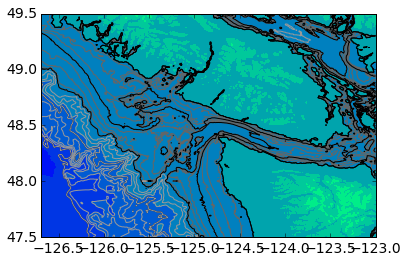

In [15]:
plotTopo()